<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit8/YangChauUnit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [ ]:
!pip install pymc-bart

In [ ]:
import pymc_bart as pmb

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

Completed

**Task2**:

What is a decision tree? How do they work?

A decision tree is a map of nodes with binary children, meaning that for each node, the path to the next node below it will be a yes or no question. For example, if a decision tree is trying to predict how much water someone might drink, there might be a node like "is exercising", with a yes or no child that determines how much water the individual will drink. Another way to think about it is by assigning a threshold for a yes or no operation. For example, if you have a model that is trained to recognize humans, you could specify that given you are 60% certain that the thing you're looking at is human, return a postitive denoting the image as human.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

Depth simply refers to how many layers are present in a tree. The general rule is that as you add more layers, you gain more complexity and ability to fit to your data. This however comes with the caveat that if you take this too far, it tends to result in overfitting. On the flip side however, making a decision tree too shallow will result in an innacurate model that won't sufficiently capture your observed data.


**Task4:**

How are BART models similar and different from a decision tree?

BART models essentially function as a group of decision trees placed in a random forest, or RF. Within these forests, BART encourages each decision tree to be as unique as possible from one another, with the end goal of increasing the diversity of results from the RF. It accomplishes primarily through a process known as boosting wherein it randomly modifies trees based on other trees in the RF. In addition to that, these types of models also regulate the depths of each tree with priors to guarantee that the decicision tree only looks at the most relevant points.

**Task5**:

Why would we use a BART model instead of a decision tree?

Given that BART models are essentially a massive amount of decision trees strapped together it's pretty obvious which model specializes in what. In the case of decision trees, speed is desired over accuracy, and decision trees represent the epitome of this philosophy. They require miniscule processing power but will almost always be orders of magnitude less accurate than a BART model. BART models then, represent the exact opposite, trading speed for accuracy. BART models also include a host of tools to combat overfitting and underfitting.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
peng_data = pd.read_csv(url).dropna()
peng_data

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


In [ ]:
X = peng_data[["flipper_length", "bill_depth", "bill_length"]]
Y = peng_data["body_mass"].to_numpy()

In [ ]:
with pm.Model() as model_pengs:
    s = pm.HalfNormal('s', 20)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s, observed=Y)
    idata_pengs = pm.sample(compute_convergence_checks=False)

Output()

In [ ]:
pm.sample_posterior_predictive(idata_pengs,model_pengs, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

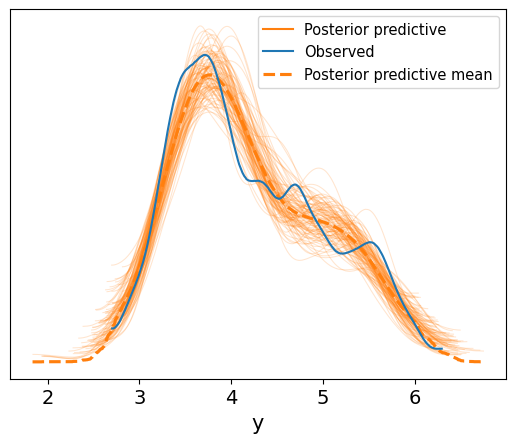

In [ ]:
ax = az.plot_ppc(idata_pengs, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

<Axes: xlabel='flipper_length', ylabel='body_mass'>

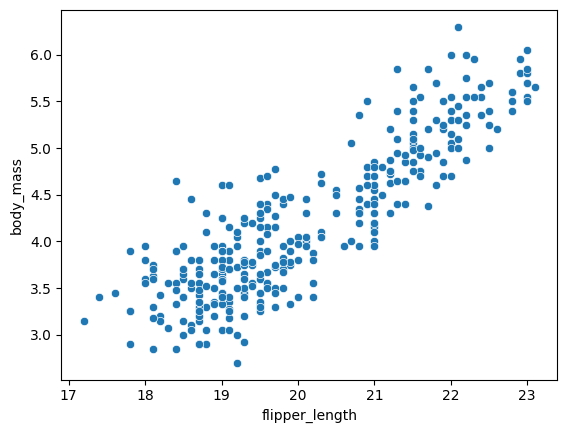

In [ ]:
sns.scatterplot(data = peng_data, y = 'body_mass', x = 'flipper_length')

In [ ]:
posterior_mean = idata_pengs.posterior["μ"]

μ_hdi = az.hdi(ary=idata_pengs, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_pengs, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


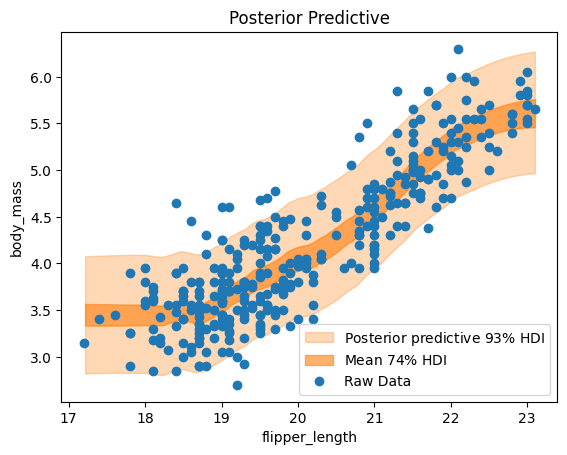

In [ ]:
idx = np.argsort(X.to_numpy()[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X.to_numpy()[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X.to_numpy()[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(peng_data['flipper_length'], peng_data["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

I think that the above prediction is pretty spot on as the model is able to match the observed data closely, but not too closely. In doing so, it is not only avoiding overfitting, but also underfitting. Additionally, it's a marked improvement over using the 2nd and 3rd row which were off by orders of magnitude.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

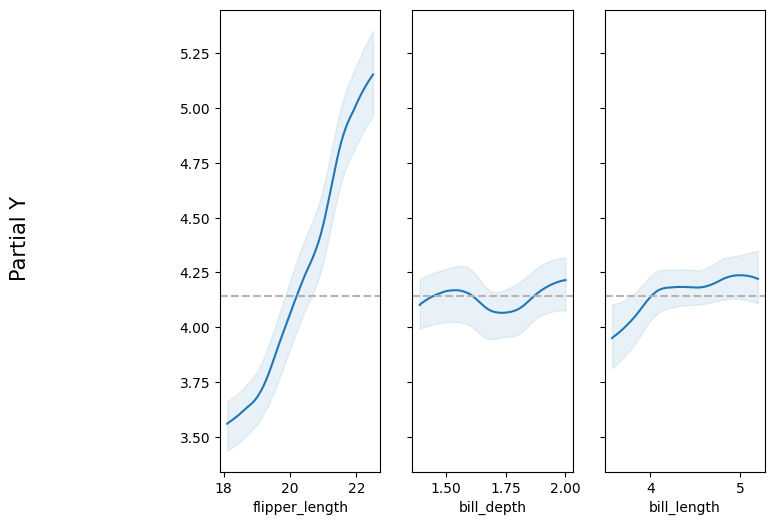

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

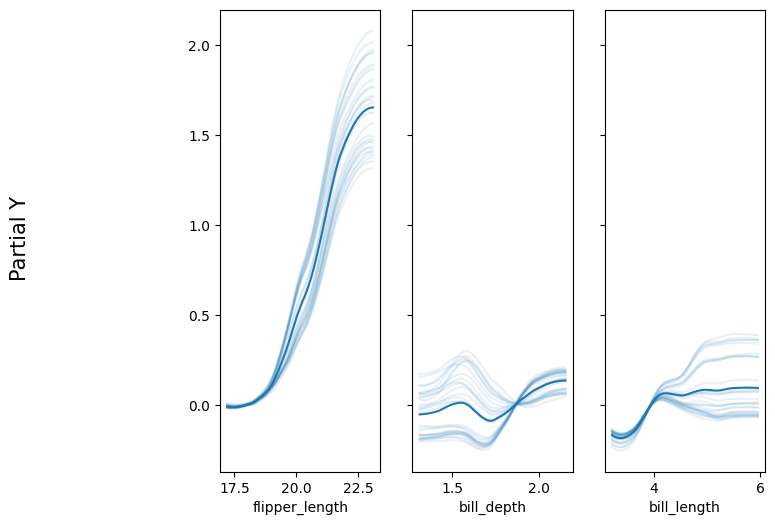

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

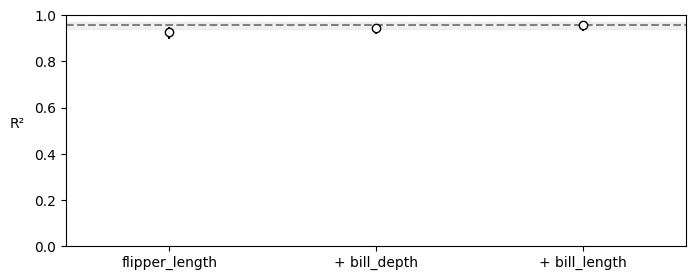

In [ ]:
vi_pengs = pmb.compute_variable_importance(idata_pengs, μ_, X)
pmb.plot_variable_importance(vi_pengs)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

Looking at the above plots, it's clear that flipper_length is the strongest contributing variable by several orders of magnitude. This can easily be seen in the PDP and ICE plots which show flipper_length having an extreme coorelation with body mass, especially in comparison with the other two variables, which have a very miniscule hold on predicting body weight. Additionally, if we consider the variable importance chart, we see that while bill length and bill depth contributed around 0.1 R^2 collectively, flipper_length accounted for around 0.9^2, making flipper length the resolute champion of predicting penguin weight. One caveat to that conclusion though: if we look at the ICE plot again we can observe that bill_depth and bill_length have several non-parallel lines, indicating that they have a greater degree of interaction with other variables than flipper_length, which has near parallel lines in its ICE plot. So while fipper_length is the strongest single contributor to penguin mass, bill_depth and bill_length have much stronger interactions with the other variables than flipper_length.